  --------   
    plt.subplots_adjust(bottom=-0.059)
    # Define x positions for text annotations
    x_positions = [region_data['year'].min(), (region_data['year'].max() + region_data['year'].min()) / 2, region_data['year'].max()]
    equations = [equation_Tmin, equation_Tmax, equation_Tavg]

    # Plot text annotations
    for x, eq in zip(x_positions, equations):
        plt.text(
            x, plt.gca().get_ylim()[0] - 2, eq,
            color='black', fontsize=12, fontweight='bold',
            ha='center', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
        )
    # Adding labels and title

-----


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pymannkendall as mk

In [2]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")
df

,date,station,regions,lat,long,elevation,Tmin,Tmax
0,1962-01-01,1316,Tarai,26.820440,87.159170,105.0,15.432384,27.691517
1,1962-01-01,1201,High Mountain,27.816670,86.716670,3450.0,-6.310116,5.949017
2,1962-01-01,1401,High Mountain,27.683330,87.783330,3119.0,-4.158616,8.100517
3,1962-01-01,1225,High Mountain,27.816670,86.716670,3700.0,-7.935116,4.324017
4,1962-01-01,1218,High Mountain,27.833330,86.766670,3857.0,-8.955616,3.303517
...,...,...,...,...,...,...,...,...
512534,2022-12-31,1307,Hill,26.983219,87.345956,1192.0,7.200000,19.000000
512535,2022-12-31,1024,Hill,27.616117,85.565503,1543.0,4.000000,17.000000
512536,2022-12-31,1419,Hill,27.143674,87.765595,1157.0,8.500000,20.000000
512537,2022-12-31,1314,Hill,27.123040,87.536190,1525.0,6.500000,15.000000


# plotting


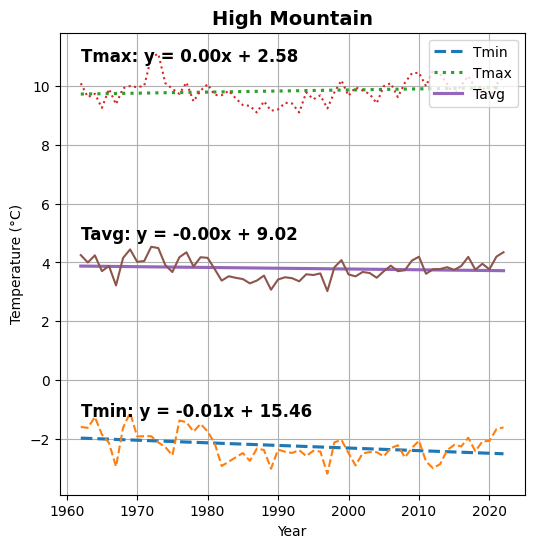

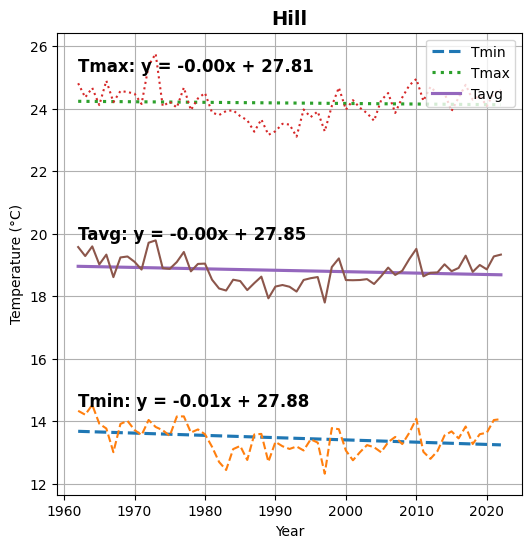

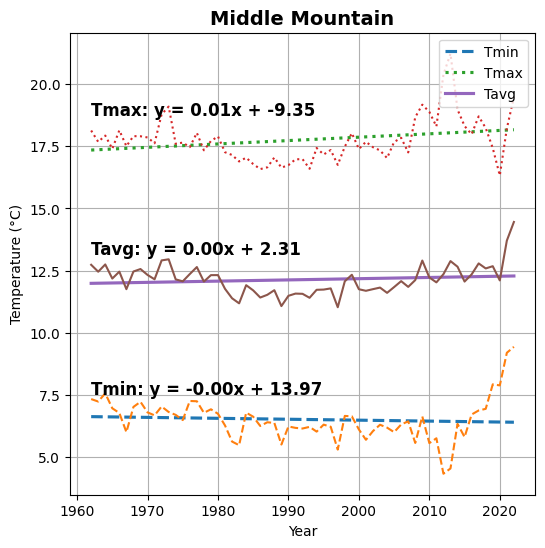

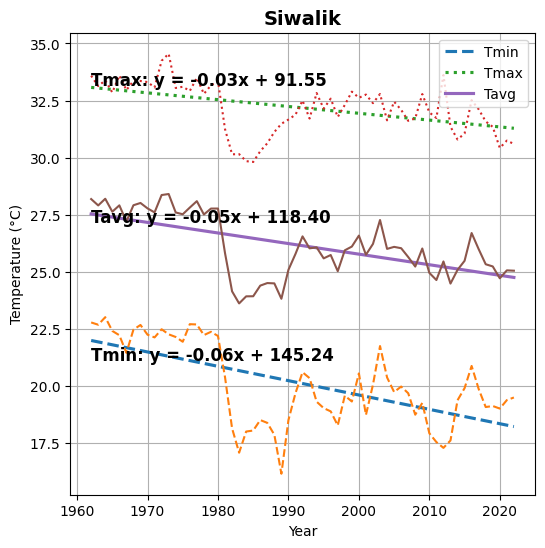

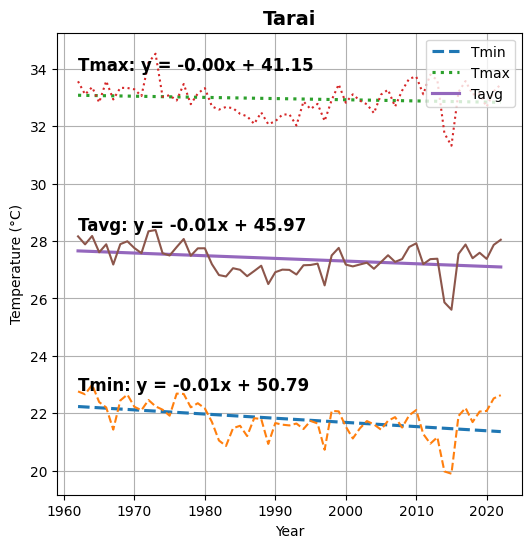

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df["Tavg"] = (df["Tmax"] + df["Tmin"]) * 0.5

# Aggregate annual Tmin and Tmax for each region
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Tavg' : "mean"
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

     # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'Tmin: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'Tmax: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'

    # Calculate regression for Tmax
    slope_Tavg, intercept_Tavg, _, _, _ = linregress(region_data['year'], region_data['Tavg'])
    equation_Tavg = f'Tavg: y = {slope_Tavg:.2f}x + {intercept_Tavg:.2f}'


    plt.figure(figsize=(6, 6))

        
    # Plotting Tmin with trendline (dashed line)
    sns.regplot(data=region_data, x='year', y='Tmin', scatter=False, label='Tmin', ci=None, line_kws={'linestyle': '--'})

    sns.lineplot(data=region_data, x='year', y='Tmin', linestyle='--')

    # Plotting Tmax with trendline (dotted line)
    sns.regplot(data=region_data, x='year', y='Tmax', scatter=False, label='Tmax', ci=None, line_kws={'linestyle': ':'})

    sns.lineplot(data=region_data, x='year', y='Tmax', linestyle=':')

    # Plotting Tavg with trendline (solid line)
    sns.regplot(data=region_data, x='year', y='Tavg', scatter=False, label='Tavg', ci=None, line_kws={'linestyle': '-'})

    sns.lineplot(data=region_data, x='year', y='Tavg', linestyle='-')



    # try
    # For text printing (all in black, bold)
    plt.text(region_data['year'].min(), region_data['Tmin'].mean() + 1, equation_Tmin, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tmax'].mean() + 1, equation_Tmax, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tavg'].mean() + 1, equation_Tavg, color='black', fontsize=12, ha='left', fontweight='bold')

    # try


    plt.title(region, fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.savefig(f'G:/fresh_start/paper/code_paper/plots/trendPlots/annual_tempAvg_avg_temp_trend_{region}.png', bbox_inches='tight')


    
    # Show the plot
    plt.show()


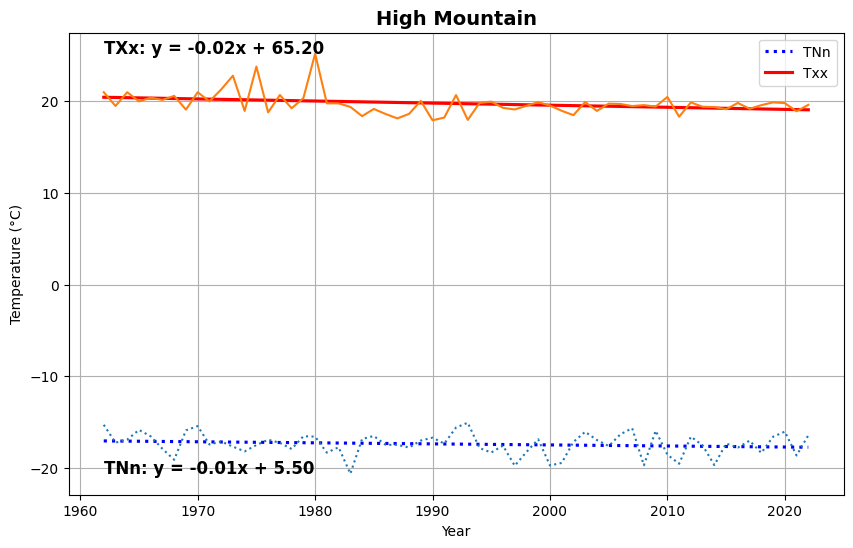

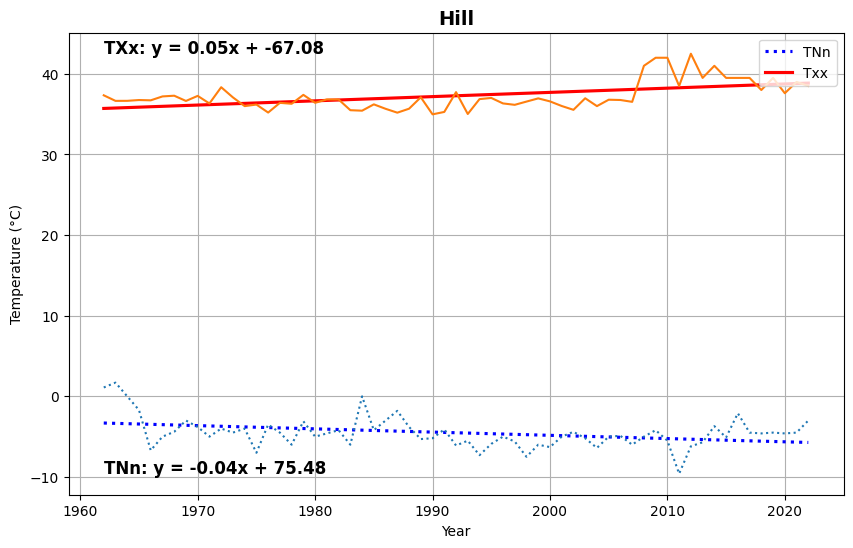

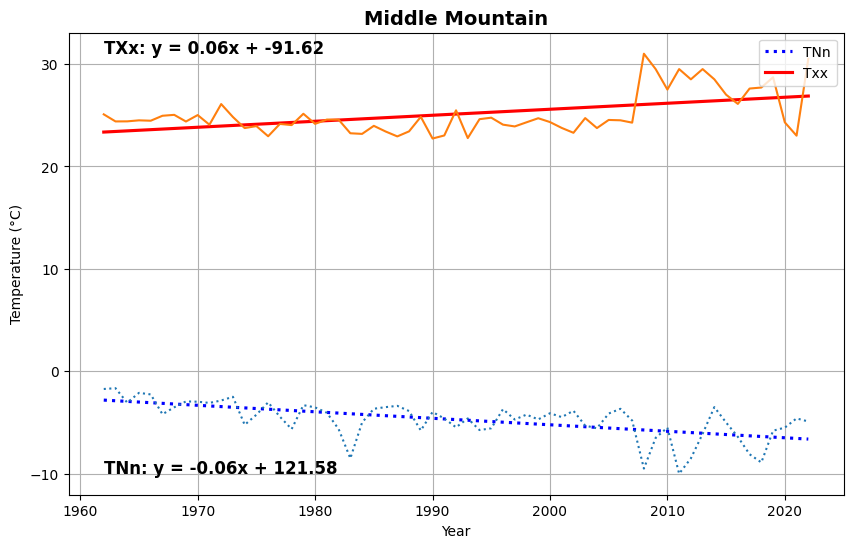

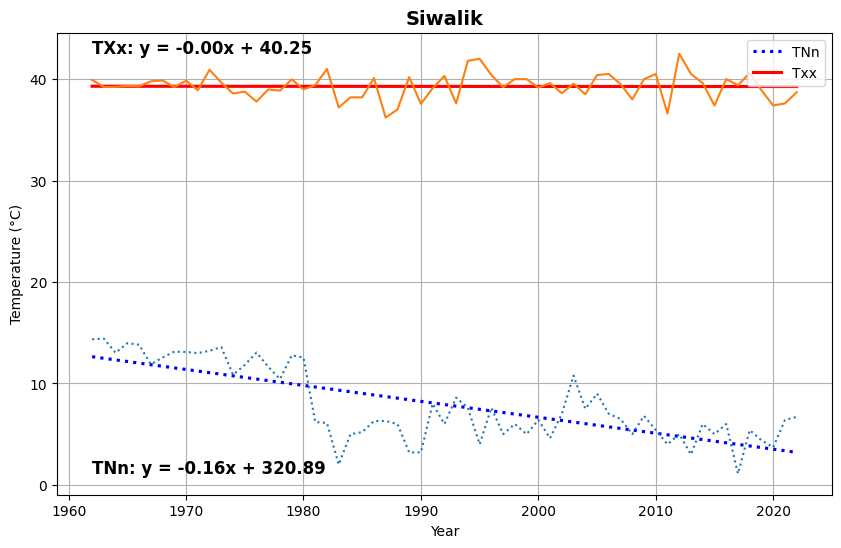

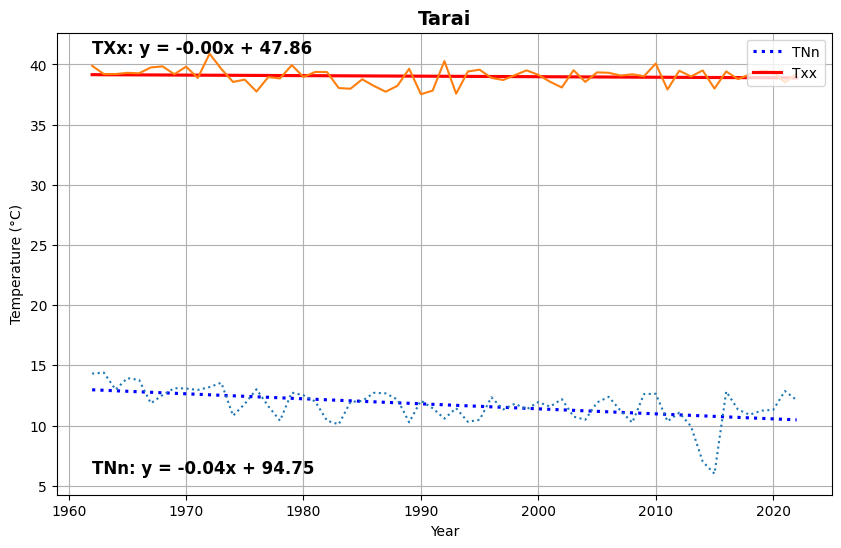

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Aggregate annual Tmin and Tmax for each region
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'min',
    'Tmax': 'max'
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

     # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'TNn: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'TXx: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'


    plt.figure(figsize=(10, 6))

    # Plotting Tmin with trendline
    sns.regplot(data=region_data, x='year', y='Tmin', scatter=False, label='TNn', color='blue', ci=None, line_kws={'linestyle': ':'})
    sns.lineplot(data=region_data, x='year', y='Tmin', linestyle=':')
    
    # Plotting Tmax with trendline
    sns.regplot(data=region_data, x='year', y='Tmax', label='Txx', scatter=False,  color='red', ci=None, line_kws={'linestyle': '-'})
    sns.lineplot(data=region_data, x='year', y='Tmax',linestyle='-')
    
    plt.text(region_data['year'].min(), region_data['Tmin'].min(), equation_Tmin, color='black', fontsize=12, fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tmax'].max(), equation_Tmax, color='black', fontsize=12, fontweight='bold')


    # Adding labels and title
    plt.title(region, fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.savefig(f'G:/fresh_start/paper/code_paper/plots/trendPlots/annual_extreme_temp_trend_{region}.png', bbox_inches='tight')


    
    # Show the plot
    plt.show()


# Table

## For avg regional

In [5]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")

In [7]:
import pandas as pd
from scipy.stats import linregress

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df["Tavg"] = (df["Tmax"] + df["Tmin"]) * 0.5
# Calculate annual mean data
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Tavg' : 'mean'
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Create an empty list to store the results
linear_reg_results = []

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

    # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'Tmin: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'Tmax: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'

    # Calculate regression for Tavg
    slope_Tavg, intercept_Tavg, _, _, _ = linregress(region_data['year'], region_data['Tavg'])
    equation_Tavg = f'Tavg: y = {slope_Tavg:.2f}x + {intercept_Tavg:.2f}'

    # Append the results for the current region to the list
    linear_reg_results.append({
        'Region': region,
        'Tmin_Slope': slope_Tmin,
        'Tmin_Intercept': intercept_Tmin,
        'Tmax_Slope': slope_Tmax,
        'Tmax_Intercept': intercept_Tmax,
        'Tavg_Slope': slope_Tavg,
        'Tavg_Intercept': intercept_Tavg,
        'Tmin_Equation': equation_Tmin,
        'Tmax_Equation': equation_Tmax,
        'Tavg_Equation': equation_Tavg
    })

# Convert the results list to a DataFrame
linear_reg_results_df = pd.DataFrame(linear_reg_results)
linear_reg_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\avg_linear_reg_results_df.csv", index=False)
# Display the DataFrame
print(linear_reg_results_df)


            Region  Tmin_Slope  Tmin_Intercept  Tmax_Slope  Tmax_Intercept  \
0    High Mountain   -0.008890       15.462114    0.003649        2.575963   
1             Hill   -0.007238       27.882094   -0.001821       27.813448   
2  Middle Mountain   -0.003745       13.974931    0.013607       -9.347352   
3          Siwalik   -0.062815      145.239807   -0.029806       91.554668   
4            Tarai   -0.014557       50.794574   -0.004113       41.146600   

   Tavg_Slope  Tavg_Intercept              Tmin_Equation  \
0   -0.002620        9.019038   Tmin: y = -0.01x + 15.46   
1   -0.004529       27.847771   Tmin: y = -0.01x + 27.88   
2    0.004931        2.313789   Tmin: y = -0.00x + 13.97   
3   -0.046310      118.397237  Tmin: y = -0.06x + 145.24   
4   -0.009335       45.970587   Tmin: y = -0.01x + 50.79   

              Tmax_Equation              Tavg_Equation  
0    Tmax: y = 0.00x + 2.58    Tavg: y = -0.00x + 9.02  
1  Tmax: y = -0.00x + 27.81   Tavg: y = -0.00x + 27.85  

In [8]:
# Create an empty list to store the Mann-Kendall results
mk_results = []

# Set up the test for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

    # Perform Mann-Kendall test for Tmin
    mk_Tmin = mk.original_test(region_data['Tmin'])
    mk_Tmax = mk.original_test(region_data['Tmax'])
    mk_Tavg = mk.original_test(region_data['Tavg'])

    # Append the results for the current region to the list
    mk_results.append({
        'Region': region,
        'Tmin_Trend': mk_Tmin.trend,
        'Tmin_p-value': mk_Tmin.p,
        'Tmin_Slope': mk_Tmin.slope,
        'Tmax_Trend': mk_Tmax.trend,
        'Tmax_p-value': mk_Tmax.p,
        'Tmax_Slope': mk_Tmax.slope,
        'Tavg_Trend': mk_Tavg.trend,
        'Tavg_p-value': mk_Tavg.p,
        'Tavg_Slope': mk_Tavg.slope
    })

# Convert the results list to a DataFrame
mk_results_df = pd.DataFrame(mk_results)

mk_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\avg_mk_results_df.csv", index=False)

# Display the DataFrame
print(mk_results_df)

            Region  Tmin_Trend  Tmin_p-value  Tmin_Slope  Tmax_Trend  \
0    High Mountain  decreasing      0.040625   -0.008560    no trend   
1             Hill  decreasing      0.043130   -0.007859    no trend   
2  Middle Mountain  decreasing      0.009123   -0.015839    no trend   
3          Siwalik  decreasing      0.000010   -0.062889  decreasing   
4            Tarai  decreasing      0.001411   -0.015453    no trend   

   Tmax_p-value  Tmax_Slope  Tavg_Trend  Tavg_p-value  Tavg_Slope  
0      0.107020    0.005232    no trend      0.935523   -0.000373  
1      0.847029   -0.000741    no trend      0.451466   -0.002519  
2      0.298699    0.007517    no trend      0.546094    0.002445  
3      0.000016   -0.033043  decreasing      0.000006   -0.050016  
4      0.562771   -0.002628    no trend      0.185012   -0.006037  


## For avg station

In [3]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df["Tavg"] = (df["Tmax"] + df["Tmin"]) * 0.5
# Calculate annual mean data
annual_data = df.groupby(['year', 'station']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Tavg' : 'mean'
}).reset_index()

# List of regions

# List of regions
stations = annual_data['station'].unique()

stations_avg_slope_results = []
# Set up the plot for each region

for station in stations:
        region_data = annual_data[annual_data['station'] == station]

        # Calculate regression for Tmin
        slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
        equation_Tmin = f'Tmin: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

        # Calculate regression for Tmax
        slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
        equation_Tmax = f'Tmax: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'

        # Calculate regression for Tavg
        slope_Tavg, intercept_Tavg, _, _, _ = linregress(region_data['year'], region_data['Tavg'])
        equation_Tavg = f'Tavg: y = {slope_Tavg:.2f}x + {intercept_Tavg:.2f}'

        stations_avg_slope_results.append({

          'station': station,
          "slope_Tmin": slope_Tmin,
          "intercept_Tmin": intercept_Tmin,
          "equation_Tmin": equation_Tmin,

          "slope_Tmax": slope_Tmax,
          "intercept_Tmax": intercept_Tmax,
          "equation_Tmax": equation_Tmax,
      
          "slope_Tavg": slope_Tavg,
          "intercept_Tavg": intercept_Tavg,
          "equation_Tavg": equation_Tavg,

        })


stations_avg_slope_results_df = pd.DataFrame(stations_avg_slope_results)

stations_avg_slope_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\stations_avg_slr_slope_results_df.csv", index=False)

stations_avg_slope_results_df

,station,slope_Tmin,intercept_Tmin,equation_Tmin,slope_Tmax,intercept_Tmax,equation_Tmax,slope_Tavg,intercept_Tavg,equation_Tavg
0,1016,0.009972,-13.732627,Tmin: y = 0.01x + -13.73,-0.008388,33.526697,Tmax: y = -0.01x + 33.53,0.000792,9.897035,Tavg: y = 0.00x + 9.90
1,1024,-0.019344,50.818174,Tmin: y = -0.02x + 50.82,-0.033511,89.734838,Tmax: y = -0.03x + 89.73,-0.026427,70.276506,Tavg: y = -0.03x + 70.28
2,1036,-0.054187,123.318213,Tmin: y = -0.05x + 123.32,-0.000650,29.407707,Tmax: y = -0.00x + 29.41,-0.027418,76.362960,Tavg: y = -0.03x + 76.36
3,1103,-0.022183,52.924866,Tmin: y = -0.02x + 52.92,0.016332,-12.022043,Tmax: y = 0.02x + -12.02,-0.002925,20.451411,Tavg: y = -0.00x + 20.45
4,1123,-0.048508,115.446601,Tmin: y = -0.05x + 115.45,0.007232,16.169163,Tmax: y = 0.01x + 16.17,-0.020638,65.807882,Tavg: y = -0.02x + 65.81
5,1124,0.004513,2.347696,Tmin: y = 0.00x + 2.35,0.007776,6.876356,Tmax: y = 0.01x + 6.88,0.006145,4.612026,Tavg: y = 0.01x + 4.61
6,1201,-0.019074,38.284789,Tmin: y = -0.02x + 38.28,-0.004186,19.696422,Tmax: y = -0.00x + 19.70,-0.011630,28.990606,Tavg: y = -0.01x + 28.99
7,1206,0.009711,-6.809509,Tmin: y = 0.01x + -6.81,0.045547,-69.263562,Tmax: y = 0.05x + -69.26,0.027629,-38.036535,Tavg: y = 0.03x + -38.04
8,1212,-0.062815,145.239807,Tmin: y = -0.06x + 145.24,-0.029806,91.554668,Tmax: y = -0.03x + 91.55,-0.046310,118.397237,Tavg: y = -0.05x + 118.40
9,1218,-0.008829,15.027283,Tmin: y = -0.01x + 15.03,-0.012306,33.316932,Tmax: y = -0.01x + 33.32,-0.010567,24.172108,Tavg: y = -0.01x + 24.17


## For extreme regional

In [ ]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")  

In [59]:
import pandas as pd
from scipy.stats import linregress

# Calculate annual extreme data
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'min',
    'Tmax': 'max'
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Create an empty list to store the results
extreme_linear_reg_results = []

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

    # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'TNn: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'TXx: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'


    # Append the results for the current region to the list
    extreme_linear_reg_results.append({
        'Region': region,
        'Tmin_Slope': slope_Tmin,
        'Tmin_Intercept': intercept_Tmin,
        'Tmax_Slope': slope_Tmax,
        'Tmax_Intercept': intercept_Tmax,
        'Tmin_Equation': equation_Tmin,
        'Tmax_Equation': equation_Tmax
    })

# Convert the results list to a DataFrame
extreme_linear_reg_results_df = pd.DataFrame(extreme_linear_reg_results)
extreme_linear_reg_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\extreme_linear_reg_results_df.csv", index=False)
# Display the DataFrame
print(extreme_linear_reg_results_df)


            Region  Tmin_Slope  Tmin_Intercept  Tmax_Slope  Tmax_Intercept  \
0    High Mountain   -0.011487        5.495366   -0.022806       65.197345   
1             Hill   -0.040159       75.479630    0.052390      -67.077195   
2  Middle Mountain   -0.063402      121.582143    0.058602      -91.624032   
3          Siwalik   -0.157114      320.891778   -0.000486       40.248516   
4            Tarai   -0.041680       94.751091   -0.004438       47.859755   

              Tmin_Equation            Tmax_Equation  
0    TNn: y = -0.01x + 5.50  TXx: y = -0.02x + 65.20  
1   TNn: y = -0.04x + 75.48  TXx: y = 0.05x + -67.08  
2  TNn: y = -0.06x + 121.58  TXx: y = 0.06x + -91.62  
3  TNn: y = -0.16x + 320.89  TXx: y = -0.00x + 40.25  
4   TNn: y = -0.04x + 94.75  TXx: y = -0.00x + 47.86  


In [58]:
# Create an empty list to store the Mann-Kendall results
extrene_mk_results = []

# Set up the extreme test for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

    # Perform Mann-Kendall test for Tmin
    mk_Tmin = mk.original_test(region_data['Tmin'])
    mk_Tmax = mk.original_test(region_data['Tmax'])
    

    # Append the results for the current region to the list
    extrene_mk_results.append({
        'Region': region,
        'Tmin_Trend': mk_Tmin.trend,
        'Tmin_p-value': mk_Tmin.p,
        'Tmin_Slope': mk_Tmin.slope,
        'Tmax_Trend': mk_Tmax.trend,
        'Tmax_p-value': mk_Tmax.p
    })

# Convert the results list to a DataFrame
extrene_mk_results_df = pd.DataFrame(extrene_mk_results)

extrene_mk_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\extrene_mk_results_df.csv", index=False)

# Display the DataFrame
print(extrene_mk_results_df)

            Region  Tmin_Trend  Tmin_p-value  Tmin_Slope  Tmax_Trend  \
0    High Mountain    no trend  2.600184e-01   -0.009848  decreasing   
1             Hill  decreasing  2.959635e-02   -0.024264  increasing   
2  Middle Mountain  decreasing  2.372399e-08   -0.057724  increasing   
3          Siwalik  decreasing  5.322863e-09   -0.157996    no trend   
4            Tarai  decreasing  3.694603e-05   -0.037431    no trend   

   Tmax_p-value  
0      0.017733  
1      0.004709  
2      0.031785  
3      0.910785  
4      0.400856  


## For extreme stations

In [69]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")  
df

,date,station,regions,lat,long,elevation,Tmin,Tmax
0,1962-01-01,1316,Tarai,26.820440,87.159170,105.0,15.432384,27.691517
1,1962-01-01,1201,High Mountain,27.816670,86.716670,3450.0,-6.310116,5.949017
2,1962-01-01,1401,High Mountain,27.683330,87.783330,3119.0,-4.158616,8.100517
3,1962-01-01,1225,High Mountain,27.816670,86.716670,3700.0,-7.935116,4.324017
4,1962-01-01,1218,High Mountain,27.833330,86.766670,3857.0,-8.955616,3.303517
...,...,...,...,...,...,...,...,...
512534,2022-12-31,1307,Hill,26.983219,87.345956,1192.0,7.200000,19.000000
512535,2022-12-31,1024,Hill,27.616117,85.565503,1543.0,4.000000,17.000000
512536,2022-12-31,1419,Hill,27.143674,87.765595,1157.0,8.500000,20.000000
512537,2022-12-31,1314,Hill,27.123040,87.536190,1525.0,6.500000,15.000000


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Aggregate annual Tmin and Tmax for each region
annual_data = df.groupby(['year', 'station']).agg({
    'Tmin': 'min',
    'Tmax': 'max'
}).reset_index()

# List of regions
stations = annual_data['station'].unique()

stations_extreme_slope_results = []
# Set up the plot for each region

for station in stations:
        station_data = annual_data[annual_data['station'] == station]

        # Calculate regression for Tmin
        slope_TNn, intercept_TNn, _, _, _ = linregress(station_data['year'], station_data['Tmin'])
        equation_TNn = f'TNn: y = {slope_TNn:.2f}x + {intercept_TNn:.2f}'

        # Calculate regression for Tmax
        slope_TXx, intercept_TXx, _, _, _ = linregress(station_data['year'], station_data['Tmax'])
        equation_TXx = f'TXx: y = {slope_TXx:.2f}x + {intercept_TXx:.2f}'

        stations_extreme_slope_results.append({

          'station': station,
          "slope_TNn": slope_TNn,
          "intercept_TNn": intercept_TNn,
          "equation_TNn": equation_TNn,
      
          "slope_TXx": slope_TXx,
          "intercept_TXx": intercept_TXx,
          "equation_TXx": equation_TXx,

        })


stations_extreme_slope_results_df = pd.DataFrame(stations_extreme_slope_results)

stations_extreme_slope_results_df.to_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\stations_slr_extreme_slope_results_df.csv", index=False)

stations_extreme_slope_results_df

,station,slope_TNn,intercept_TNn,equation_TNn,slope_TXx,intercept_TXx,equation_TXx
0,1016,-0.034809,65.043405,TNn: y = -0.03x + 65.04,0.003474,16.188136,TXx: y = 0.00x + 16.19
1,1024,-0.067303,135.660035,TNn: y = -0.07x + 135.66,0.021890,-12.970658,TXx: y = 0.02x + -12.97
2,1036,-0.140907,283.730567,TNn: y = -0.14x + 283.73,-0.004160,42.420504,TXx: y = -0.00x + 42.42
3,1103,-0.046837,88.853862,TNn: y = -0.05x + 88.85,0.017417,-7.240972,TXx: y = 0.02x + -7.24
4,1123,-0.112001,231.378400,TNn: y = -0.11x + 231.38,0.048461,-59.294614,TXx: y = 0.05x + -59.29
5,1124,-0.028720,58.401855,TNn: y = -0.03x + 58.40,0.028860,-28.745545,TXx: y = 0.03x + -28.75
6,1201,0.007576,-25.577434,TNn: y = 0.01x + -25.58,-0.034327,86.241371,TXx: y = -0.03x + 86.24
7,1206,0.013577,-25.038075,TNn: y = 0.01x + -25.04,0.037323,-45.513829,TXx: y = 0.04x + -45.51
8,1212,-0.157114,320.891778,TNn: y = -0.16x + 320.89,-0.000486,40.248516,TXx: y = -0.00x + 40.25
9,1218,-0.007890,2.861256,TNn: y = -0.01x + 2.86,-0.043965,102.891121,TXx: y = -0.04x + 102.89
